In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D

In [33]:
figdir = '/Users/annabroido/Dropbox/Research/ICONProject/1Scale_Free_Networks/writing/Figures/'
fulldf = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/LRTAnalysis/analysis/hyps.p')
analysis = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/LRTAnalysis/analysis/analysis.p')

In [13]:
ALMOST_BLACK = '0.125'
DARK = '0.4'
GRAY_COLOR = '0.5'
ALL_COLOR = (0.156, 0.254, 0.466)
SUPERWEAK_COLOR = (0.647, 0.772, 0.972)
WEAKEST_COLOR = (0.419, 0.627, 0.960)
WEAK_COLOR = (0.258, 0.525, 0.85)
STRONG_COLOR = (0.223, 0.368, 0.674)
STRONGEST_COLOR = (0.156, 0.254, 0.466)
LABEL_SIZE = 13
TICK_SIZE = 13

In [14]:
def make_domain_ploth(ax, df, xlab=False):
    tot = float(len(df))
    strongest = len(df.query('Strongest==True'))
    strong = len(df.query('Strong==True'))
    weak = len(df.query('Weak==True'))
    weakest = len(df.query('Weakest==True'))
    superweak = len(df.query('Super_Weak==True'))
    fail = (len(df.query("Weakest==False").query("Super_Weak==False")))

    width = 4
    totwid = 4
    xlocs = np.arange(0,4*totwid,totwid)
    xlocs = np.append(xlocs, xlocs[-1]+totwid+width/2.)
    xlocs = np.append(xlocs, xlocs[-1]+totwid+width/2.)
    counts = [strongest, strong, weak, weakest, superweak, fail]
    barheights = [count/tot for count in counts]
    colors=[STRONGEST_COLOR, STRONG_COLOR, WEAK_COLOR, WEAKEST_COLOR, SUPERWEAK_COLOR, GRAY_COLOR]
    ylabels = ['Strongest', 'Strong', 'Weak', 'Weakest', 'Super-Weak', 'Not\n Scale-Free' ]
    yticks = xlocs+width/2.
    for i in range(6):
        ax.barh(bottom=xlocs[i],width=barheights[i], height=width, color = colors[i],edgecolor='w')
        ax.text(barheights[i]+0.02,yticks[i],'%d (%.2f)' %(int(counts[i]) ,barheights[i]) , fontsize=LABEL_SIZE, ha='left', va='center')
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
#     ax.set_yticklabels([])
    ax.set_xlim(0,1.0)
    if xlab:
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    else:
        ax.set_xticks([])
    ax.axhline((xlocs[3]+width + xlocs[4])/2., color=ALMOST_BLACK, linewidth=2)
    ax.axhline((xlocs[4]+width + xlocs[5])/2., color=ALMOST_BLACK, linewidth=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)

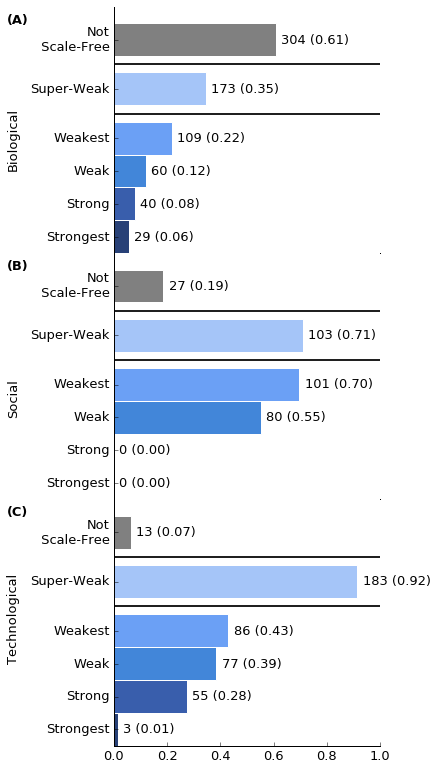

In [39]:
#fig, [[ax, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(8,9))
fig, [ax, ax3, ax5] = plt.subplots(3,1,figsize=(5,10.5))
query = 'Domain =="Biological"' 
df = fulldf.query(query)
make_domain_ploth(ax, df)

query = 'Domain =="Social"' 
df = fulldf.query(query)
make_domain_ploth(ax3, df)

query = 'Domain =="Technological"' 
df = fulldf.query(query)
make_domain_ploth(ax5, df, True)

# make_domain_ploth(ax2, fulldf, True)

ax.text(-0.4, 10, 'Biological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
ax3.text(-0.4, 10, 'Social' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
ax5.text(-0.4, 10, 'Technological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
ax.text(-0.4, 28, '(A)' , fontsize=LABEL_SIZE, ha='left', weight='bold')
ax3.text(-0.4, 28, '(B)' , fontsize=LABEL_SIZE, ha='left', weight='bold')
ax5.text(-0.4, 28, '(C)' , fontsize=LABEL_SIZE, ha='left', weight='bold')


plt.tight_layout(pad=0, w_pad=0, h_pad=0)

plt.savefig(figdir + 'sfdomains.eps',format='eps', bbox_inches='tight', dpi=1000)
plt.show()

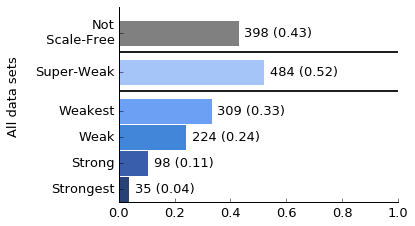

In [42]:
# full corpus
#fig, [[ax, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(8,9))
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

make_domain_ploth(ax, fulldf, True)
ax.text(-0.4, 10, 'All data sets' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'sfall.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

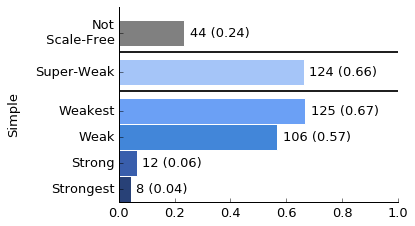

In [41]:
# simple graphs
simpledf = analysis.query('Weighted==False & Directed == False & Bipartite == False & Multigraph == False & Multiplex == False')
simplehyps = fulldf.loc[np.unique(simpledf.fp_gml)]
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
make_domain_ploth(ax, simplehyps, True)
ax.text(-0.4, 10, 'Simple' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.savefig(figdir + 'sfsimple.eps', format='eps', bbox_inches='tight', dpi=1000)
plt.show()

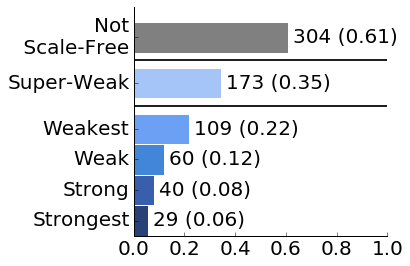

In [28]:
#for presentations
LABEL_SIZE = 20
TICK_SIZE = 20
fig, ax = plt.subplots(1,1,figsize=(5.5,3.5))
query = 'Domain =="Biological"' 
df = fulldf.query(query)
make_domain_ploth(ax, df, True)
# ax.text(-0.4, 10, 'Biological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.tight_layout(pad=0, w_pad=0, h_pad=1)
plt.show()

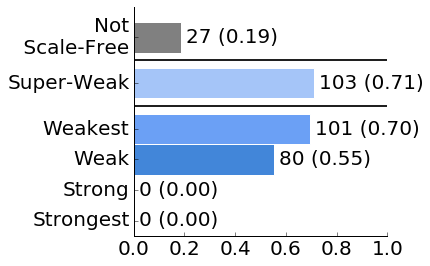

In [33]:
fig, ax3 = plt.subplots(1,1,figsize=(5.5,3.5))
query = 'Domain =="Social"' 
df = fulldf.query(query)
make_domain_ploth(ax3, df, True)
# ax3.text(-0.4, 10, 'Social' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.tight_layout(pad=0, w_pad=0, h_pad=1)
plt.show()

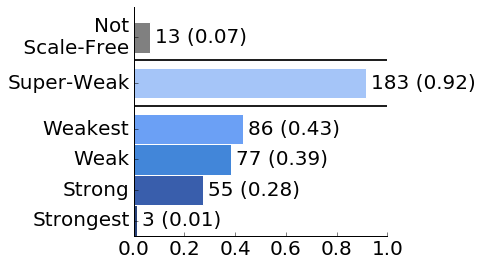

In [34]:
fig, ax5 = plt.subplots(1,1,figsize=(5.5,3.5))
query = 'Domain =="Technological"' 
df = fulldf.query(query)
make_domain_ploth(ax5, df, True)
# ax5.text(-0.4, 10, 'Technological' , fontsize=LABEL_SIZE, rotation=90, va='bottom')
plt.tight_layout(pad=0, w_pad=0, h_pad=1)
plt.show()

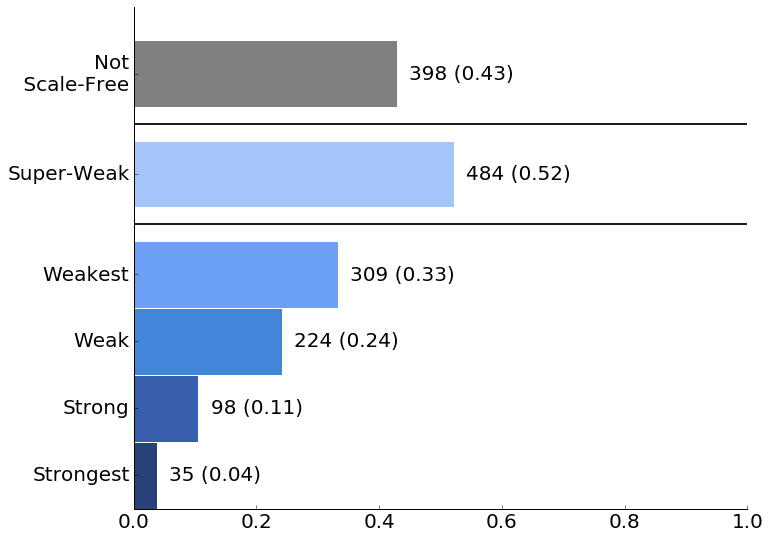

In [40]:
# full corpus
#fig, [[ax, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(8,9))
fig, ax = plt.subplots(1,1,figsize=(11,9))

make_domain_ploth(ax, fulldf, True)
plt.show()

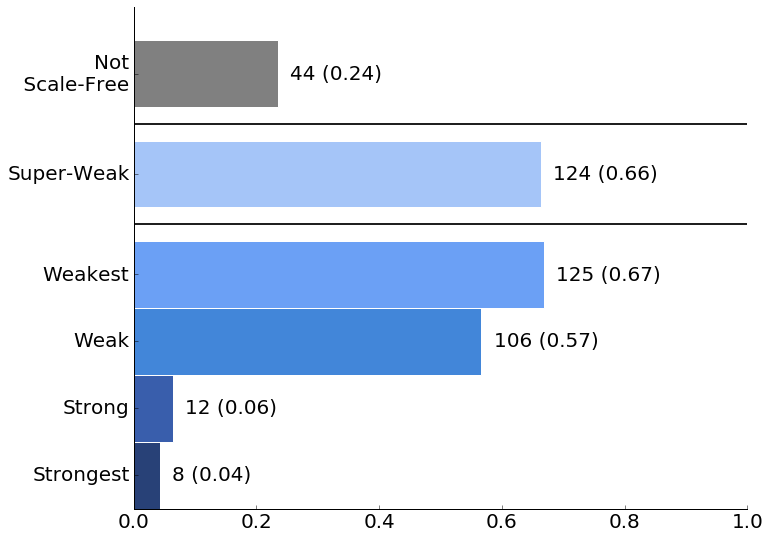

In [42]:
# simple graphs
simpledf = analysis.query('Weighted==False & Directed == False & Bipartite == False & Multigraph == False & Multiplex == False')
simplehyps = fulldf.loc[np.unique(simpledf.fp_gml)]
fig, ax = plt.subplots(1,1,figsize=(11,9))
make_domain_ploth(ax, simplehyps, True)
plt.show()